In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

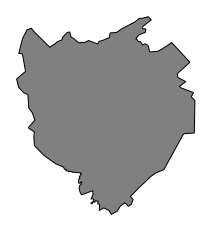

In [2]:
# Import Yerevan map from OSM
city = ox.geocode_to_gdf("Yerevan, Armenia")
city = ox.project_gdf(city)
fig = city.plot(fc = 'gray', ec = 'black')
ax = fig.axis('off')

In [3]:
# city.to_file('city.shp')

In [4]:
geometry = city['geometry'].iloc[0]

In [5]:
# Cut up geometry into many quadrats with 750 m linear width 
geometry_cut = ox.utils_geo._quadrat_cut_geometry(geometry, quadrat_width = 750)

In [6]:
# Append every quadrats into a polygon list
polylist = [p for p in geometry_cut]

In [7]:
polylist[0].representative_point().coords[:][0]

(450453.22267293825, 4449760.0352703035)

<function matplotlib.pyplot.show(close=None, block=None)>

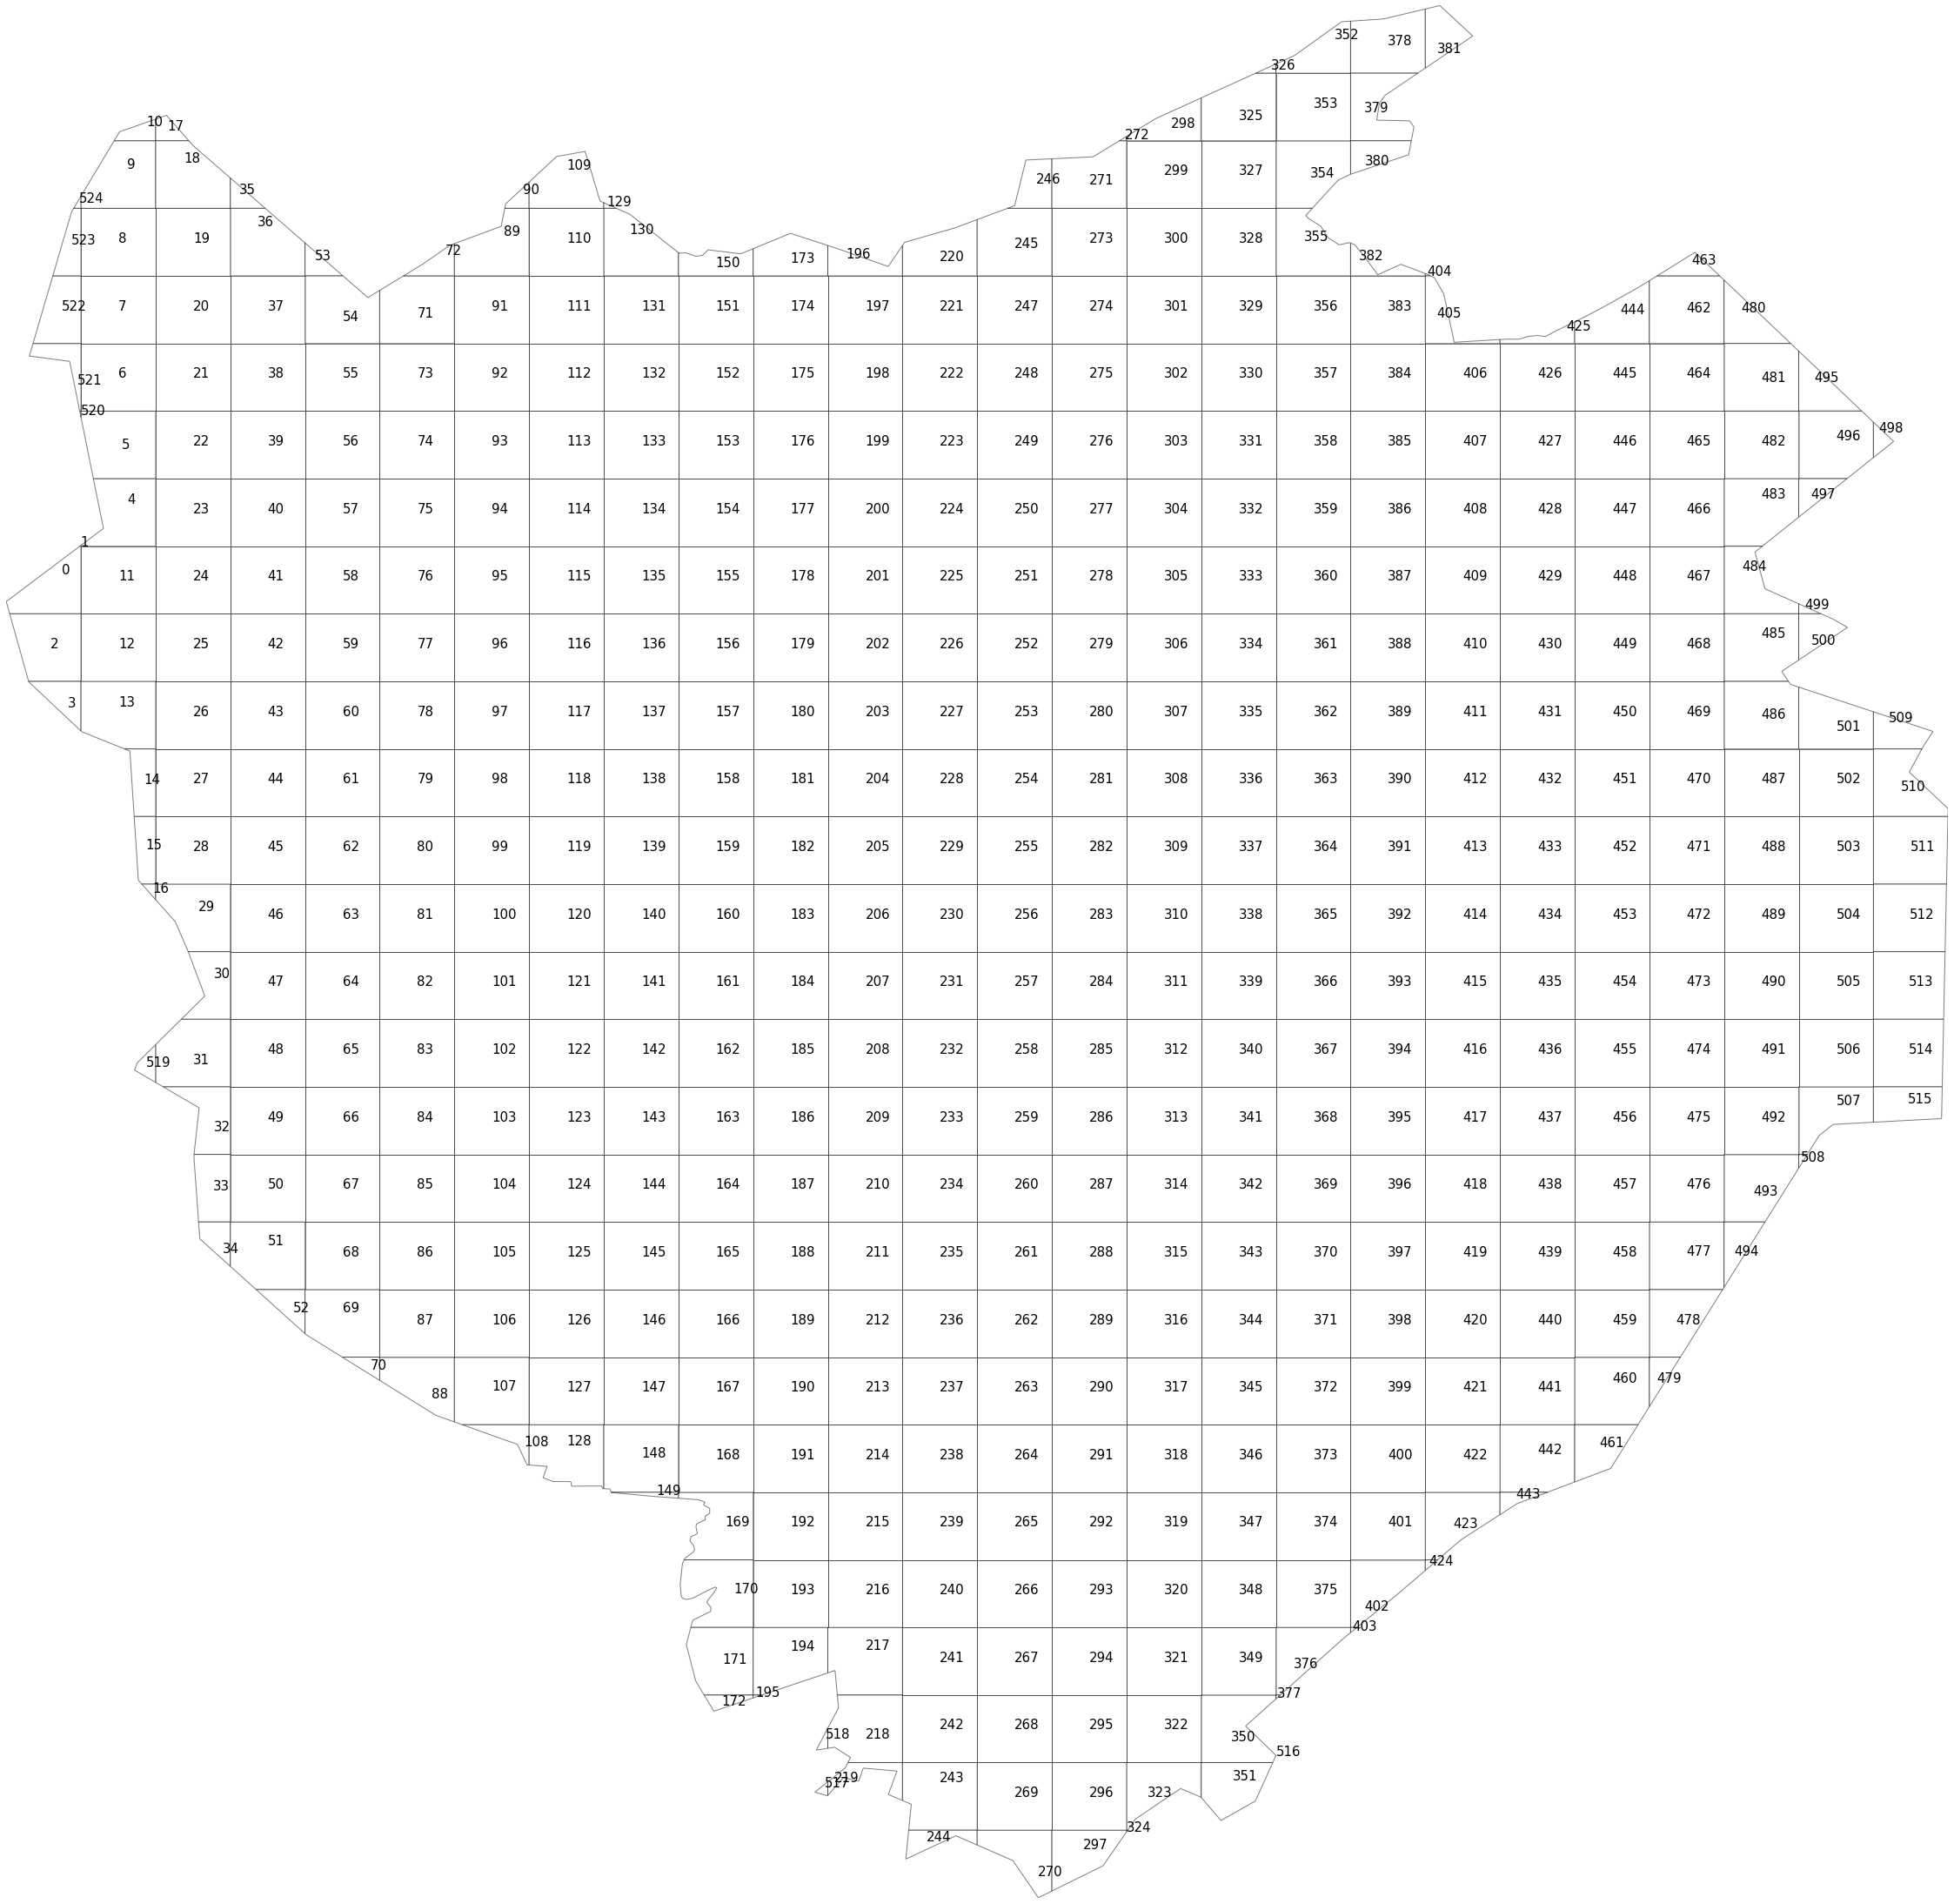

In [8]:
# Plot city
west, south, east, north = city.unary_union.bounds
fig, ax = plt.subplots(figsize = (40,40))
for polygon, n in zip(geometry_cut, np.arange(len(polylist))):
    p = polygon.representative_point().coords[:][0]
    patch = PolygonPatch(polygon, fc = '#fff', ec = "#000", alpha = 0.5, zorder = 2)
    ax.add_patch(patch)
    plt.annotate(text = n, xy = p, size = 15)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show

In [9]:
polyframe = gpd.GeoDataFrame(geometry = polylist)
polyframe.crs = city.crs
polyframe.head()

geometry
0  POLYGON ((449912.757 4449454.549, 450626.235 4...
1  POLYGON ((450626.235 4450065.522, 450636.949 4...
2  POLYGON ((450636.949 4449319.919, 450636.949 4...
3  POLYGON ((450636.949 4448574.317, 450636.949 4...
4  POLYGON ((450636.949 4450074.697, 450854.875 4...

In [10]:
city.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((449912.757 4449454.549, 450130.662 4...   40.253947   40.065685   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat        lon  \
0  44.632871  44.411555  258460970  relation  364087  40.177612  44.512585   

       display_name     class            type  importance  
0  Yerevan, Armenia  boundary  administrative    0.857025

(4875492.0553135285, 4902914.137966398)

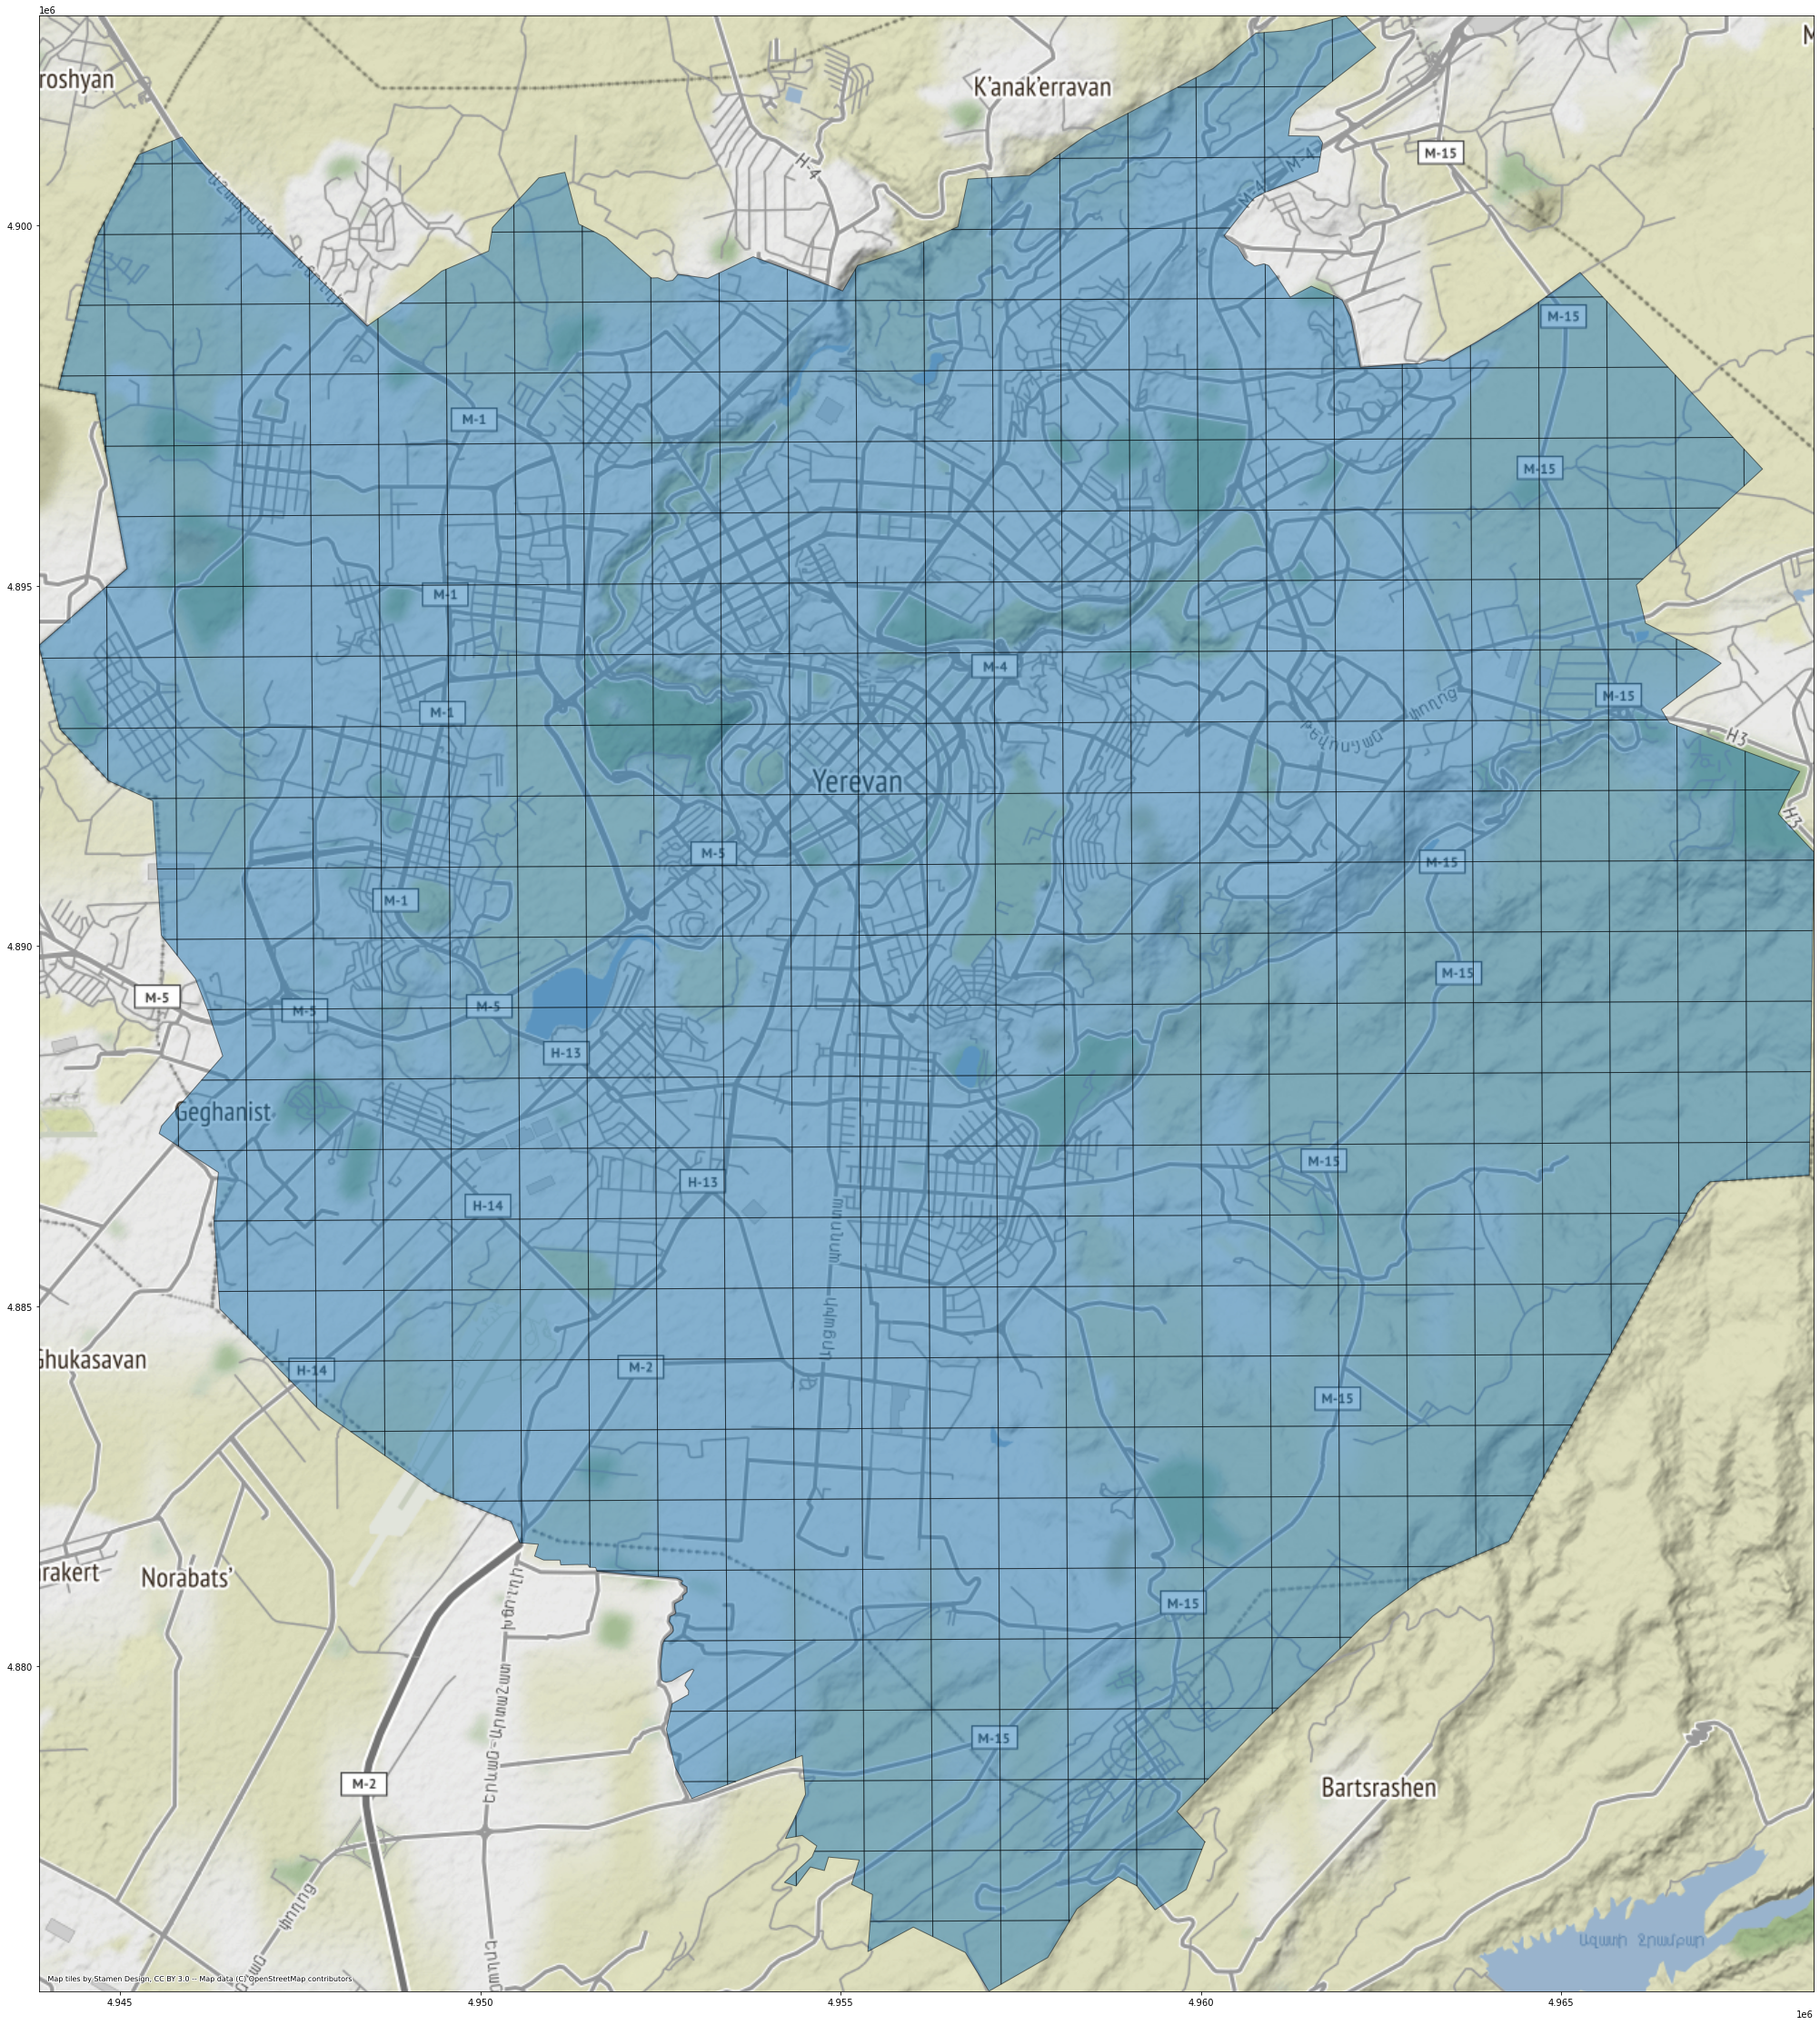

In [11]:
import contextily as ctx
polyframe_3857 = polyframe.to_crs(epsg = 3857)
west, south, east, north = polyframe_3857.unary_union.bounds

ax = polyframe_3857.plot(figsize = (40,40), alpha = 0.5, ec = 'k')
ctx.add_basemap(ax, zoom = 13)
ax.set_xlim(west, east)
ax.set_ylim(south, north)

In [13]:
# Random population repartition creation 
population = []
for i in range(length):
    population.append(random.random()*1000)

525


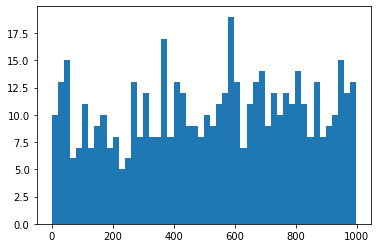

In [14]:
plt.hist(population, bins = 50)
plt.show()

In [15]:
polyframe['population'] = population
polyframe.head()

geometry  population
0  POLYGON ((449912.757 4449454.549, 450626.235 4...  115.398141
1  POLYGON ((450626.235 4450065.522, 450636.949 4...  470.800963
2  POLYGON ((450636.949 4449319.919, 450636.949 4...  615.651592
3  POLYGON ((450636.949 4448574.317, 450636.949 4...  645.878586
4  POLYGON ((450636.949 4450074.697, 450854.875 4...  424.463459

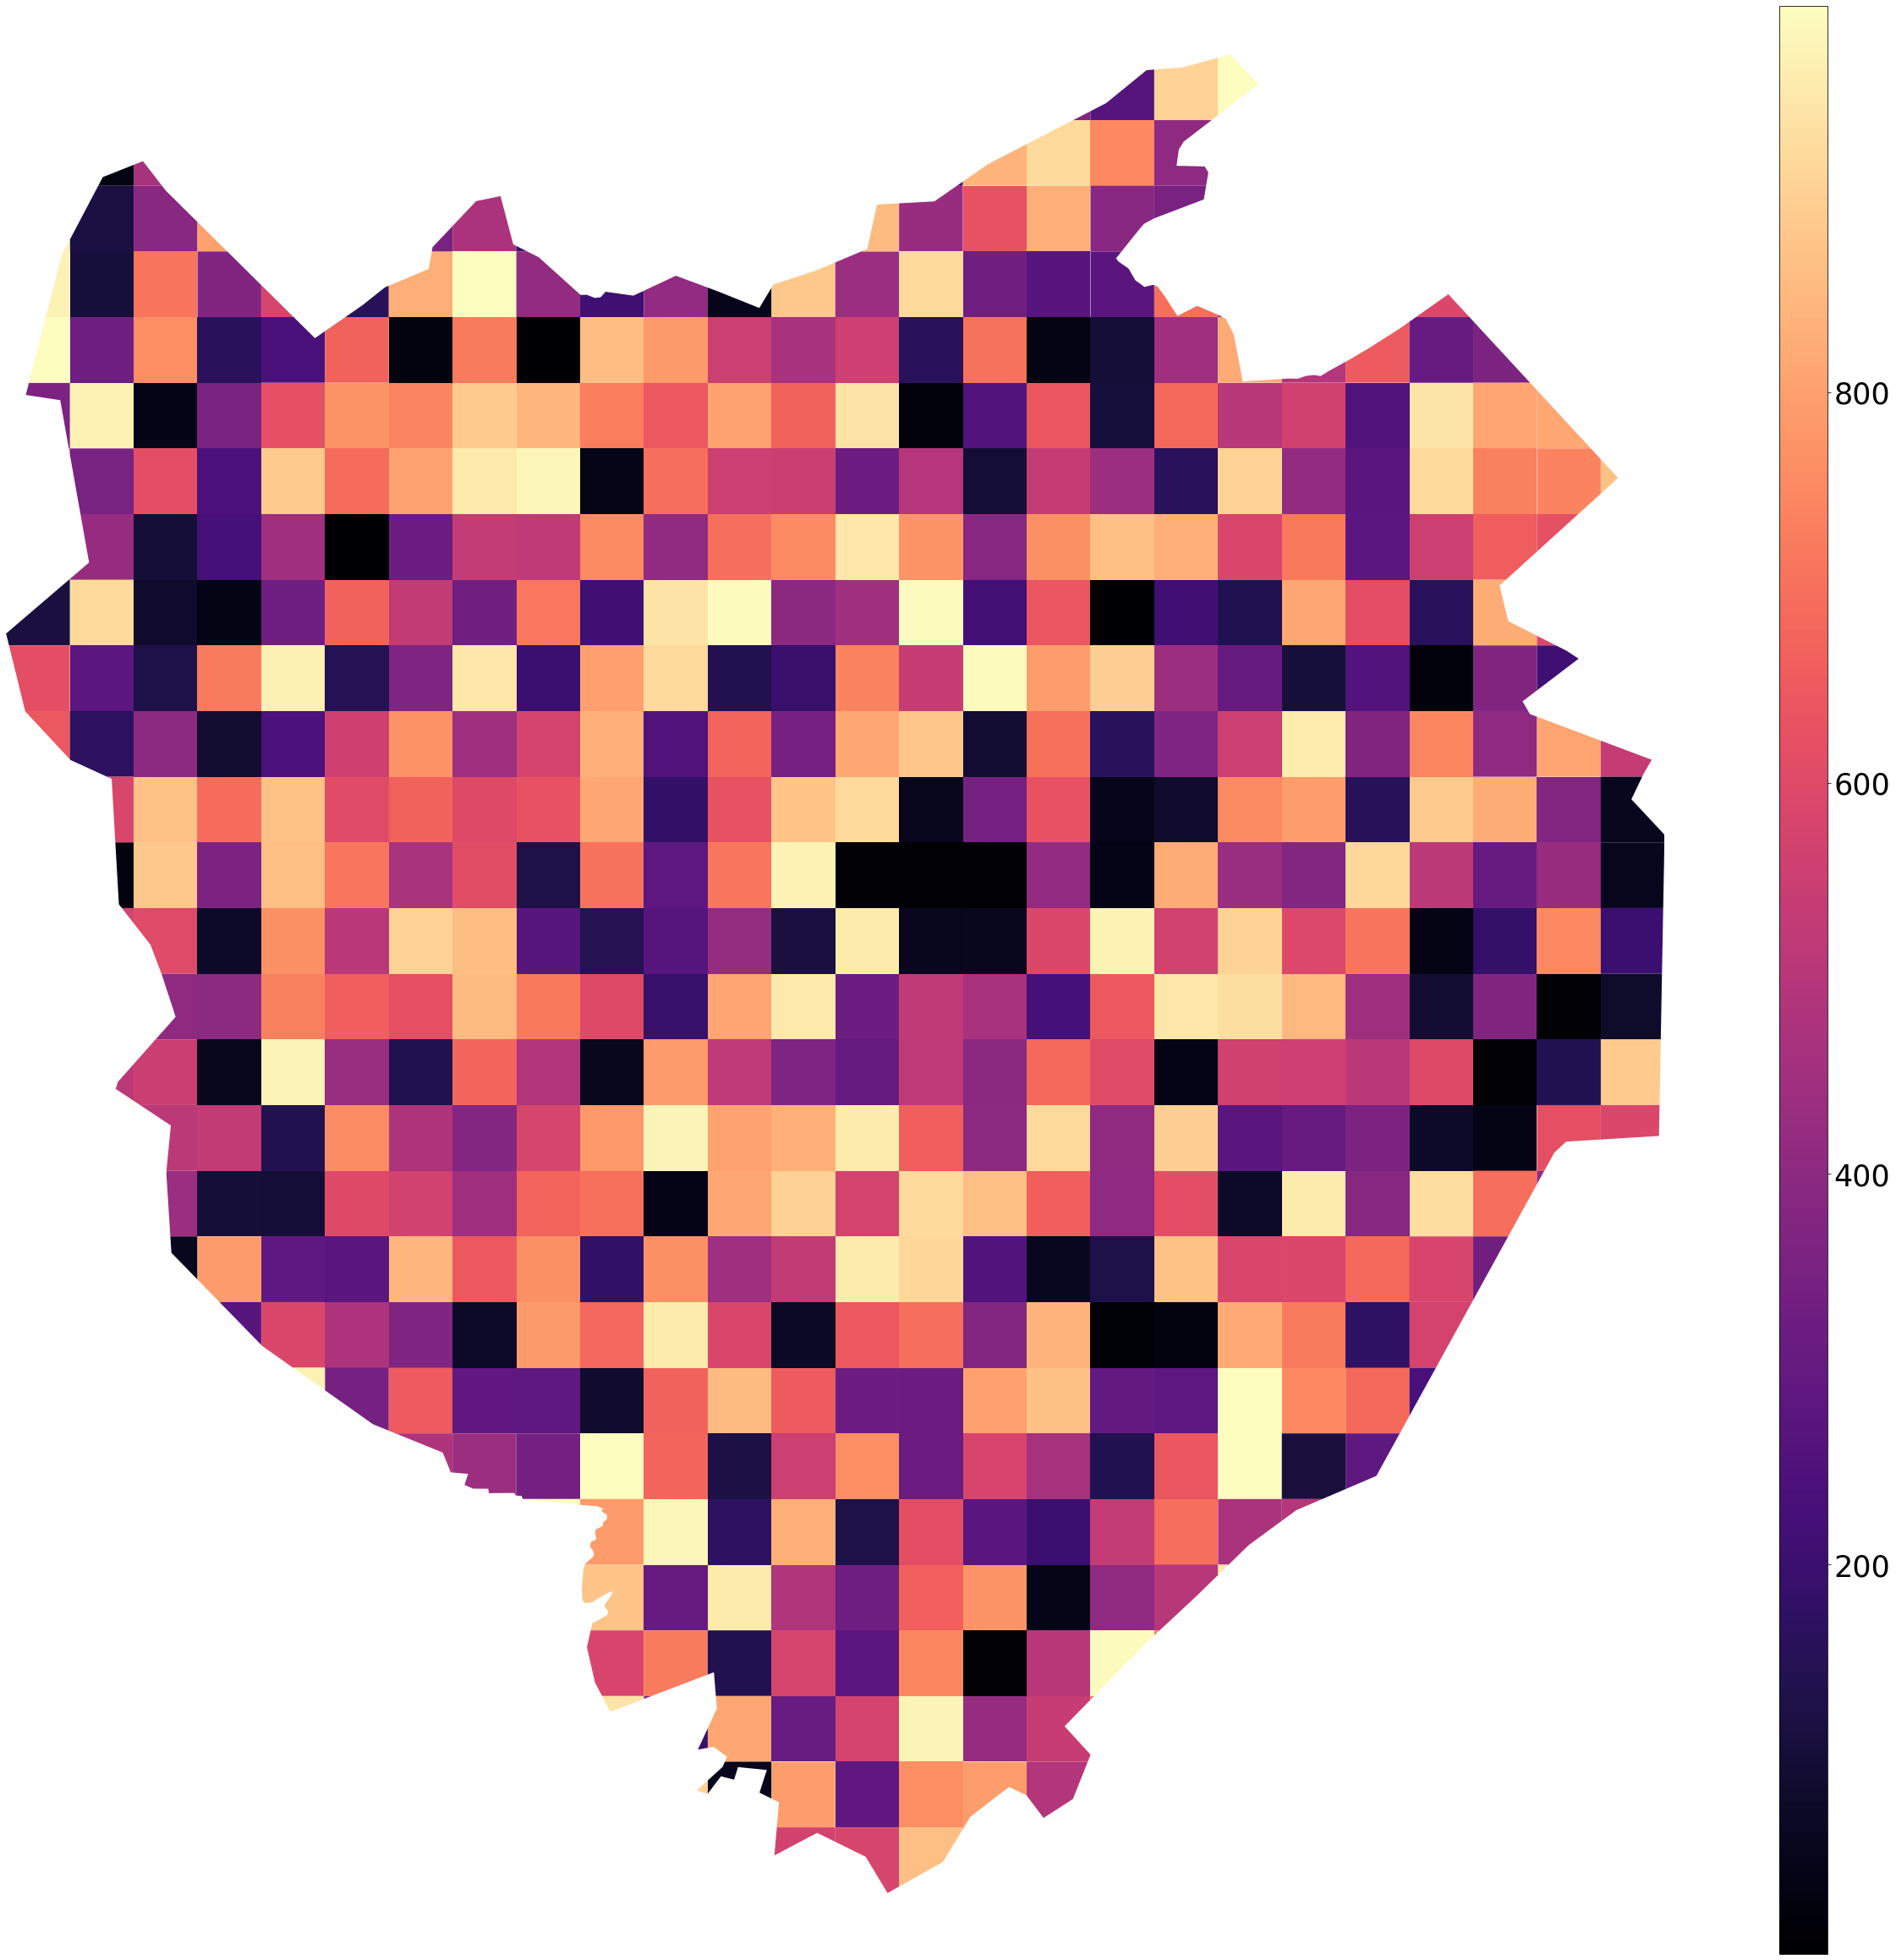

In [16]:
plt.rcParams.update({'font.size':35})
west, south, east, north = polyframe.unary_union.bounds

fig, ax = plt.subplots(figsize = (40,40))
polyframe.plot(ax = ax, column = 'population', legend = False, cmap = 'magma')

cbax = fig.add_axes([0.9, 0.1, 0.02, 0.8])

sm = plt.cm.ScalarMappable(
    cmap = 'magma',\
    norm = plt.Normalize(vmin = min(polyframe.population), vmax = max(polyframe.population))
)

sm._A = []

# Draw colormap into cbax
fig.colorbar(sm, cax = cbax, format = "%d")

ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')

plt.show()